![loc](img/bg_logo.svg)

### a Python ecosystem for computational (neuro)anatomy

_Federico Claudi; Luigi Petrucco; Adam L. Tyson_

## Toward whole-brain neuroscience

 - Increasing number of large scale, whole-brain datasets;
 - coordinate spaces are required to map multiple data types on the same space (gene expression, connectomics data, electrophysiology probes)
 


<p style="text-align:right;">
<img src="img/gene_expression.png" alt="drawing" width="260"/>
<img src="img/probes.png" alt="drawing" width="260"/>
<img src="img/streamlines.png" alt="drawing" width="260"/>
<p/>
 

New tools are being developed to work with these increasingly large datasets

AMAP

cellfinder (Adam Tyson @ SWC)

brainrender (Federico Claudi @ SWC)

...but they are (were) mostly based on the mouse Allen Brain Atlas!

![loc](img/fede_tw.jpg)

## Existing atlas APIs


More and more atlases and coordinate systems are appearing for different animal models


 - existing atlas APIs limitations: 
     - **web-only** (e.g.: zebrafish¹; Franklin Paxinos-Allen unified atlas²);
     - **very large**, serving together both atlas and project-specific data (e.g.: Allen)
 
<br/><br/>

¹ <sub>Kunst et al, 2019: cellular-resolution atlas of the larval zebrafish brain</sub>

² <sub>Chon et al, 2019 Enhanced and unified anatomical labeling for a common mouse brain atlas</sub>

 Therefore:
 - analysis pipelines require complicated remote data fetching
 - it is not easy to implement atlas-agnostic software

in R the `natverse` package provides a solution...

![loc](img/natverse.png)

...but in Python?

## Our solution:   `bg_atlasapi` 

A lightweight module to use reference spaces in your Python packages and analysis scripts.

![banner](img/banner.jpg)

### Installation:

```pip install bg-atlasapi```

### Usage:

In [30]:
from bg_atlasapi import BrainGlobeAtlas, show_atlases

In [31]:
show_atlases()

In [32]:
bg_atlas = BrainGlobeAtlas("allen_mouse_100um")

print(bg_atlas)

╭──────────────────────────────────────────────────────────────────╮
│                        Allen mouse 100um                         │
│                                                                  │
│         name:  allen_mouse (v1.2)                                │
│      species:  Mus musculus                                      │
│     citation:  Wang et al 2020                                   │
│                https://doi.org/10.1016/j.cell.2020.04.007        │
│         link:  http://www.brain-map.org                          │
│                                                                  │
│  orientation:  asr                                               │
│    symmetric:  True                                              │
│   resolution:  [100.0, 100.0, 100.0]                             │
│        shape:  [132, 80, 114]                                    │
╰──────────────────────────────────────────────────────────────────╯



A `BrainGlobeAtlas` contains:

 * **atlas description**:
     * metadata
     * brain structures hierarchy
 * **stacks**:
     * reference anatomical stack
     * region annotation stack
     * hemisphere annotation stack
 * **structures meshes**

### Metadata

In [33]:
bg_atlas.metadata

{'name': 'allen_mouse',
 'citation': 'Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007',
 'atlas_link': 'http://www.brain-map.org',
 'species': 'Mus musculus',
 'symmetric': True,
 'resolution': [100.0, 100.0, 100.0],
 'orientation': 'asr',
 'version': '1.2',
 'shape': [132, 80, 114],
 'trasform_to_bg': [[1.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 1.0]],
 'additional_references': []}

### Regions hierarchy

In [35]:
bg_atlas.structures["VIS"]

{'acronym': 'VIS', 'id': 669, 'name': 'Visual areas', 'structure_id_path': [997, 8, 567, 688, 695, 315, 669], 'rgb_triplet': [8, 133, 140], 'mesh_filename': PosixPath('/Users/luigipetrucco/.brainglobe/allen_mouse_100um_v1.2/meshes/669.obj'), 'mesh': None}

### Atlas stacks

In [55]:
reference_stack = bg_atlas.reference
annotation_stack = bg_atlas.annotation
import numpy as np

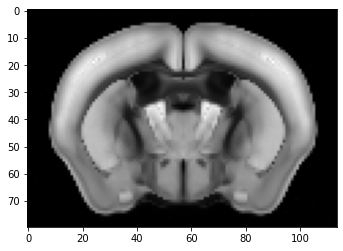

In [75]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(reference_stack[60, :, :], 
           cmap="gray")

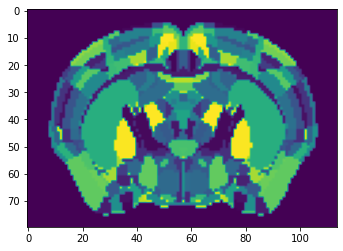

In [76]:
plt.figure()
plt.imshow(annotation_stack[60, :, :].astype(
    np.uint8))

### Regions masks

In [78]:
# Generate numpy stack with the mask for a region:
mask_stack = bg_atlas.get_structure_mask("Isocortex")

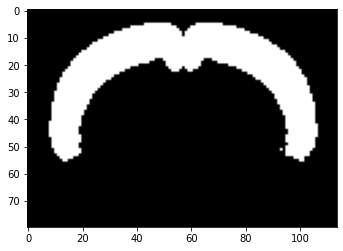

In [79]:
plt.figure()
plt.imshow(mask_stack[60, :, :], cmap="gray")

### Regions meshes

In [42]:
from trimesh import load
mesh = load(bg_atlas.meshfile_from_structure("Isocortex"))
mesh.show()

## Usage cases: `brainrender`

- software for visualization of neuroscientific data;
- supports multiple atlases and animal models through `bg-atlasapi`

<p style="text-align:center;">
<img src="img/fish_cb.gif" alt="drawing" width="400"/>
<img src="img/mouse_cb.gif" alt="drawing" width="400"/>
</p>

## Usage cases: `cellfinder`

- deep learning algorithm for 3D cell detection in whole mouse brain image datasets
- multiple annotations (Allen, integrated Allen and Franxis-Paxinos) thanks to `bg-atlasapi` integration

![banner](img/cellfinder.png)

## BrainGlobe: an ecosystem for neuroanatomy in Python

## Outlook

- `bg-atlasapi v1.0` freshly out
- we are looking for 
    - users feedback!
    - new atlases to support and distribute
    - integration with other software

## Thanks to:
Old and new contributors to bg-atlasapi...
 - Federico Claudi (SWC)
 - Adam Tyson (SWC)
 - Nicholas Del Grosso (SWC)

## ...and you for your attention! 🙏